In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from rflearn.env import WindGridWorld, CliffGridWorld
from rflearn.algo import MCIteration, TabularQValue, TabularPolicy
from rflearn.algo.td import TDIteration

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cliff World

In [7]:
env = CliffGridWorld(4, 12)
qvalues = TabularQValue(env.S, env.A)
policy = TabularPolicy(env.S, env.A, epsilon=0.1)
sarsa = TDIteration(env, qvalues, policy)
sarsa.fit(gamma=1, alpha=0.8, kind='maxq')

In [8]:
sarsa.transform(50000)

100%|██████████| 50000/50000 [00:04<00:00, 12079.30it/s]


In [129]:
sum_r = []
r = 0
for a in sarsa.hist:
    r += a['step'].r1
    if a['step'].is_terminal:
        sum_r.append(r)
        r = 0

In [126]:
np.mean(sum_r)

-58.518740629685155

In [130]:
np.mean(sum_r)

-23.359391581181466

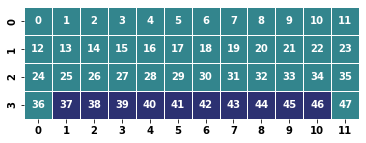

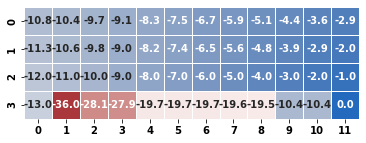

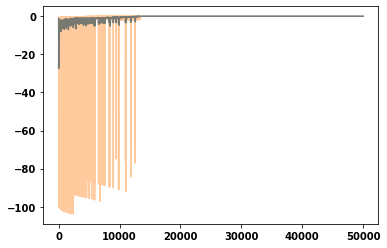

In [47]:
env.plot_grid('state')
plt.show()

v_vals = qvalues.get_all_values(policy)
sns.heatmap(v_vals.reshape(env.shape), square=True, cbar=False, cmap='vlag_r', linewidths=0.5, annot=True, fmt='.1f')
plt.show()

trace = pd.Series(sarsa.hist)
trace.ewm(halflife=25).mean().plot()
trace.plot(alpha=0.4)
plt.show()

# Windy Grid World

In [55]:
env = WindGridWorld()
qvalues = TabularQValue(env.S, env.A)
policy = TabularPolicy(env.S, env.A, epsilon=0.1)
sarsa = QLearning(env, qvalues, policy)
sarsa.fit(gamma=1, alpha=0.1)

In [56]:
sarsa.transform(50000)

100%|██████████| 50000/50000 [00:03<00:00, 12529.66it/s]


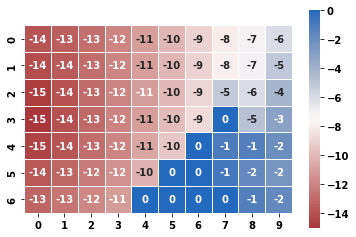

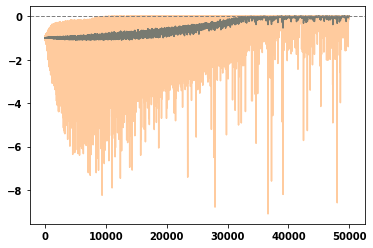

In [57]:
v_vals = qvalues.get_all_values(policy).reshape(env.shape)
sns.heatmap(v_vals, linewidths=0.5, cmap='vlag_r', square=True, annot=True, fmt='.0f')
plt.show()

loss = pd.Series(sarsa.hist)
loss.ewm(halflife=25).mean().plot()
loss.plot(alpha=0.4)
plt.axhline(0, linestyle='--', color='grey',linewidth=1)
plt.show()